# Objective
Evaluate 100 calibrated ensemble outputs for 10 model configurations
Here, 
* model1=HEC-HMS
* model2=VIC
* model3=SAC-SMA
* model4-10=Variances of available model structures

In [1]:
import glob,os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
outdir = '/glade/work/manab/ff/1_calib/output/calib100'

## List of parameter sets and calibrated model outputs

In [3]:
mod1 = sorted(glob.glob(outdir + '/*_001_runs_best*.nc'))
mod2 = sorted(glob.glob(outdir + '/*_002_runs_best*.nc'))
mod3 = sorted(glob.glob(outdir + '/*_003_runs_best*.nc'))
mod4 = sorted(glob.glob(outdir + '/*_004_runs_best*.nc'))
mod5 = sorted(glob.glob(outdir + '/*_005_runs_best*.nc'))
mod6 = sorted(glob.glob(outdir + '/*_006_runs_best*.nc'))
mod7 = sorted(glob.glob(outdir + '/*_007_runs_best*.nc'))
mod8 = sorted(glob.glob(outdir + '/*_008_runs_best*.nc'))
mod9 = sorted(glob.glob(outdir + '/*_009_runs_best*.nc'))
mod10 = sorted(glob.glob(outdir + '/*_010_runs_best*.nc'))

mod1par = sorted(glob.glob(outdir + '/*_001_para_best*.nc'))
mod2par = sorted(glob.glob(outdir + '/*_002_para_best*.nc'))
mod3par = sorted(glob.glob(outdir + '/*_003_para_best*.nc'))
mod4par = sorted(glob.glob(outdir + '/*_004_para_best*.nc'))
mod5par = sorted(glob.glob(outdir + '/*_005_para_best*.nc'))
mod6par = sorted(glob.glob(outdir + '/*_006_para_best*.nc'))
mod7par = sorted(glob.glob(outdir + '/*_007_para_best*.nc'))
mod8par = sorted(glob.glob(outdir + '/*_008_para_best*.nc'))
mod9par = sorted(glob.glob(outdir + '/*_009_para_best*.nc'))
mod10par = sorted(glob.glob(outdir + '/*_010_para_best*.nc'))

In [4]:
def qextract(nclist, ncvar):
    '''
    Extracts the yearly maximums for all years and ensembles and concatenates them 
    into a single array
    
    nclist: List of all ensembles
    ncvar: Variable for which yearly maximum has to be calculated
    '''
    ncdat = np.empty([37,])
    for count, value in enumerate(nclist):
        ncout = xr.open_dataset(value)[ncvar]
        ncout = ncout.groupby('time.year').max()
        ncout = ncout.where((ncout.year > 1979), drop = True) #Time cutoff
        q = ncout.values
        ncdat = np.c_[ncdat, q]
        print('Extracting yearly maximums from ensemble ' + str(count+1) + ' of 100 \r', end='')
    #ncdat = np.delete(ncdat,(0), axis=1)
    return(ncdat)

def vextract(nclist, ncvar):
    '''
    Extracts any variable from each ensemble and concatenates them 
    into a single array
    
    nclist: List of all ensembles
    ncvar: Variable to be extracted
    '''
    var = np.empty([1,])
    for count, value in enumerate(nclist):
        nc = xr.open_dataset(value)
        ncv = nc[ncvar].values
        var = np.c_[var, ncv]
        print('Extracting variable values from ensemble ' + str(count+1) + ' of 100 \r', end='')
    
    var = np.delete(var,(0), axis=1)
    return(var)

## Import simulated outputs and observations

In [5]:
# Prepare observation data 
ncout = xr.open_dataset(mod1[1])
ncout = ncout.groupby('time.year').max()
ncout = ncout.where((ncout.year > 1979), drop = True)
qobs = ncout['obsq'].values

In [6]:
mod1q = qextract(mod1, 'q_routed')
mod2q = qextract(mod2, 'q_routed')
mod3q = qextract(mod3, 'q_routed')
mod4q = qextract(mod4, 'q_routed')
mod5q = qextract(mod5, 'q_routed')
mod6q = qextract(mod6, 'q_routed')
mod7q = qextract(mod7, 'q_routed')
mod8q = qextract(mod8, 'q_routed')
mod9q = qextract(mod9, 'q_routed')
mod10q = qextract(mod10, 'q_routed')

## Flow Duration Curves

In [7]:
def plotfdc(qdat, obsdat, pylabel, ptitle, psave):
    '''
    Calculates and plot exceedances of FUSE model outputs
    
    qdat: Simulation data
    qobs: Observation data
    pylabel: Y-axis plot label
    ptitle: Title of the plot
    psave: Plot name for saving
    
    '''
    # Calculate exceedance levels of sim data
    exceedanceens = np.arange(1.,len(qdat)+1) /len(qdat)
    sortens = np.sort(qdat, axis=0)[::-1]

    qmeandat = qdat.mean(axis=1)
    
    # Calculate exceedance levels of mean simulated data
    exceedancemean = np.arange(1.,len(qmeandat)+1) /len(qmeandat)
    sortmean = np.sort(qmeandat, axis=0)[::-1]
    
    # Calculate exceedance levels of obs data
    exceedanceobs = np.arange(1.,len(obsdat)+1) /len(obsdat)
    sortobs = np.sort(obsdat, axis=0)[::-1]
    
    # Plot
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,8))
    plt.fill_between(exceedanceens*100, np.min(sortens, axis=1),np.max(sortens, axis=1), label = "Sim Q Ensemble")
    plt.plot(exceedancemean*100, sortmean, label = 'Sim Q Mean', color='red')
    plt.plot(exceedanceobs*100, sortobs, label = 'Obs Q', color='black')
    plt.xlabel("Exceedence [%]")
    plt.ylabel(pylabel)
    plt.title(ptitle)
    plt.legend()
    plt.savefig(psave, bbox_inches='tight', dpi=300)
    plt.show()

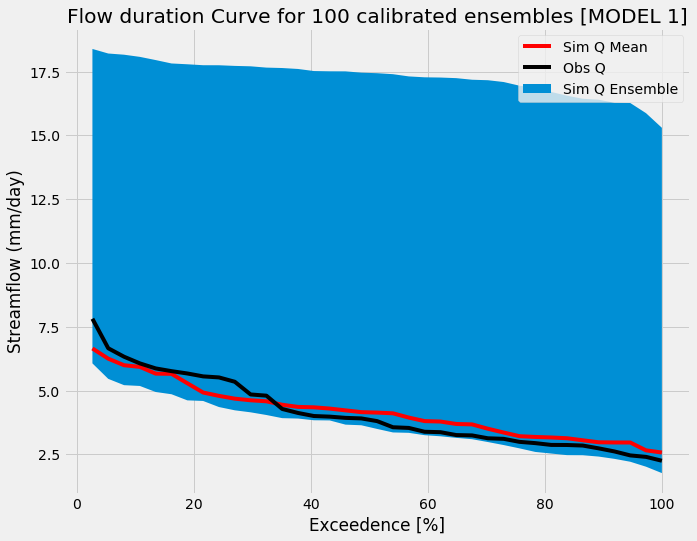

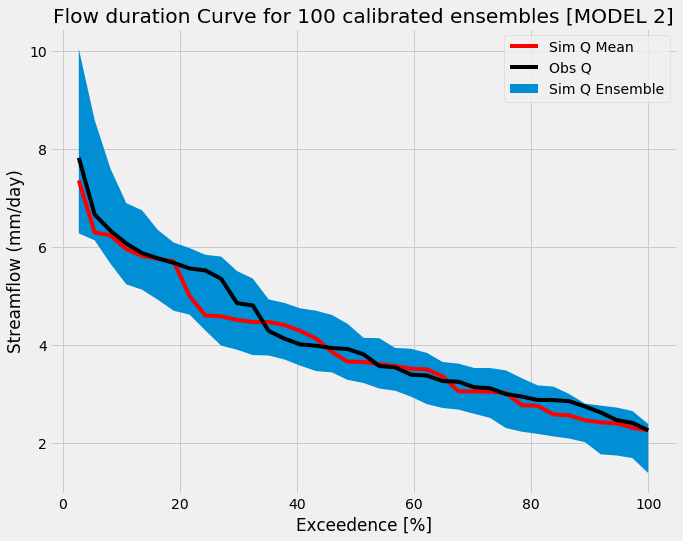

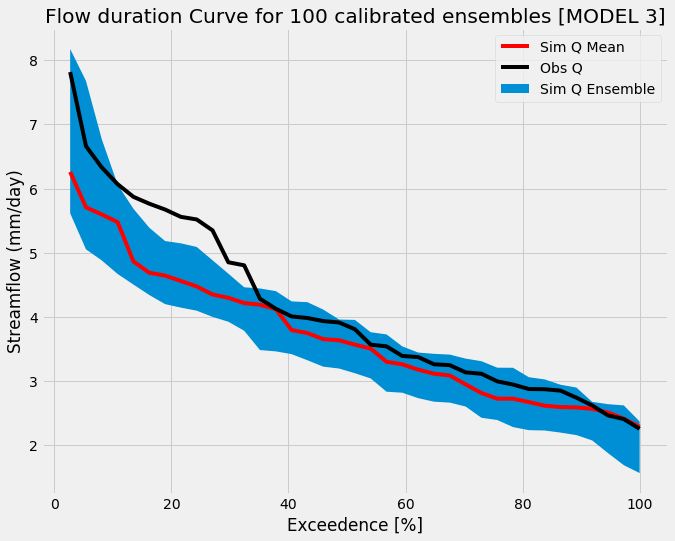

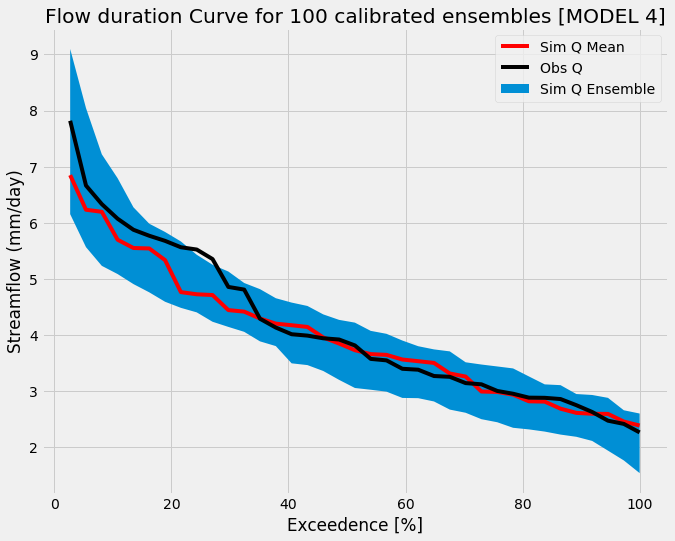

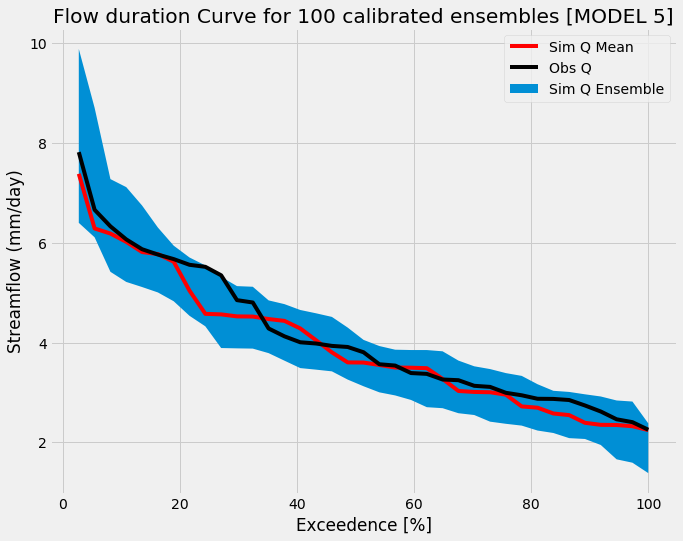

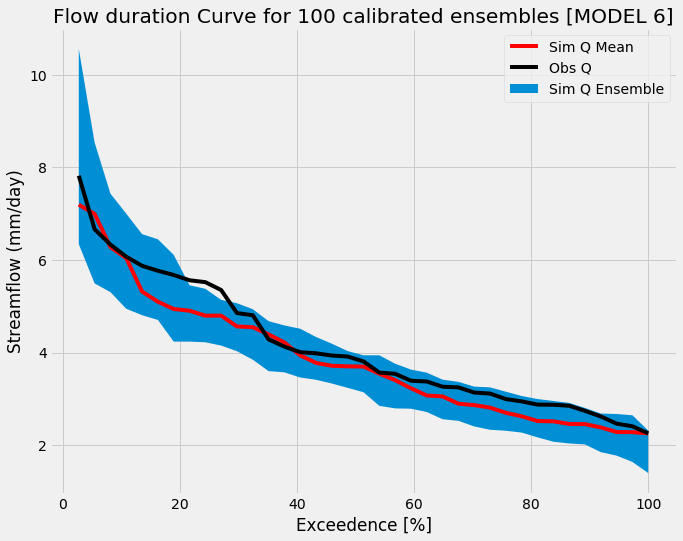

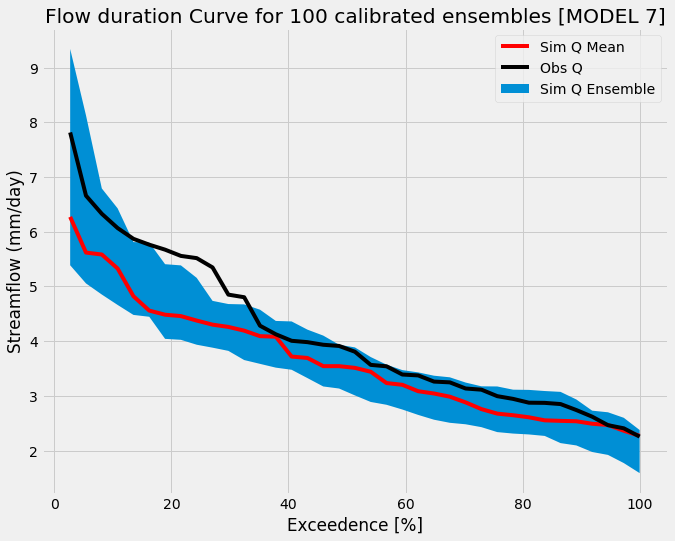

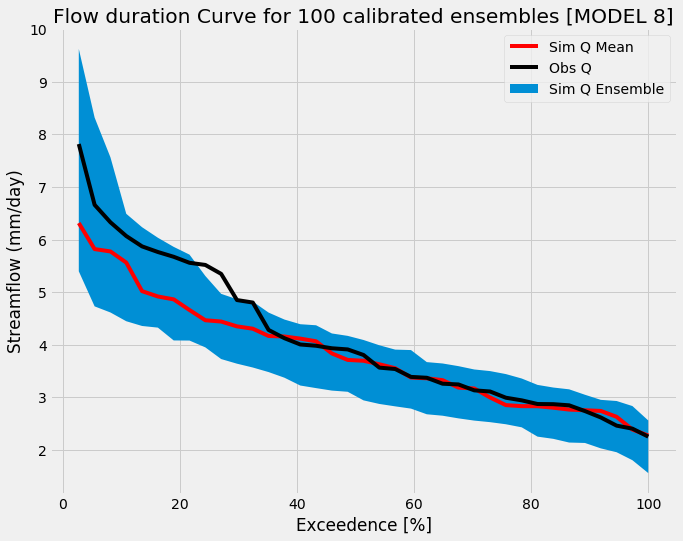

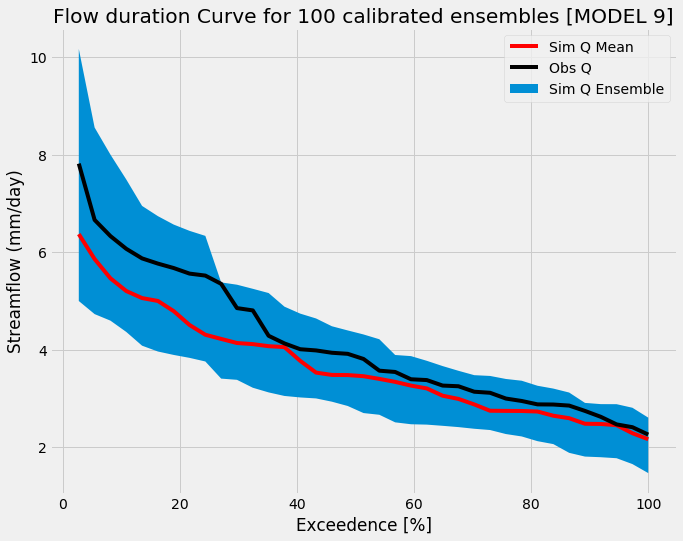

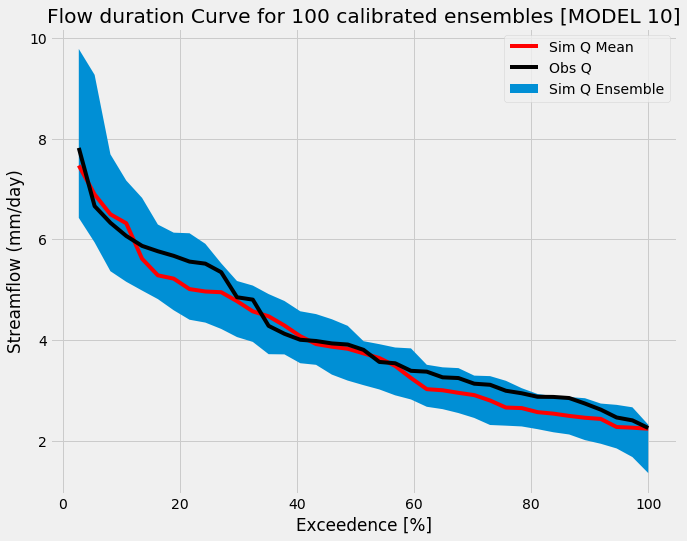

In [8]:
plotfdc(mod1q, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 calibrated ensembles [MODEL 1]', 'figures/mod1.png')
plotfdc(mod2q, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 calibrated ensembles [MODEL 2]', 'figures/mod2.png')
plotfdc(mod3q, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 calibrated ensembles [MODEL 3]', 'figures/mod3.png')
plotfdc(mod4q, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 calibrated ensembles [MODEL 4]', 'figures/mod4.png')
plotfdc(mod5q, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 calibrated ensembles [MODEL 5]', 'figures/mod5.png')
plotfdc(mod6q, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 calibrated ensembles [MODEL 6]', 'figures/mod6.png')
plotfdc(mod7q, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 calibrated ensembles [MODEL 7]', 'figures/mod7.png')
plotfdc(mod8q, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 calibrated ensembles [MODEL 8]', 'figures/mod8.png')
plotfdc(mod9q, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 calibrated ensembles [MODEL 9]', 'figures/mod9.png')
plotfdc(mod10q, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 calibrated ensembles [MODEL 10]', 'figures/mod10.png')

In [9]:
def plotpeakq(qdat, obsdat, pylabel, ptitle, psave):
    '''
    Calculates and plot peak flows of FUSE model outputs
    '''
    sort = np.flipud(np.sort(qdat, axis=0)[::-1])
    
    # Prepare mean ensemble data
    meanq = qdat.mean(axis=1)
    
    # Plot
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,8)) 
    plt.plot(sort, color='lightblue')
    plt.plot(np.sort(meanq), label = 'Mean Q', color='red')
    plt.plot(np.sort(obsdat), label = 'Obs Q', color='black')
    plt.xlabel('')
    plt.ylabel(pylabel)
    plt.title(ptitle)
    plt.legend()
    plt.savefig(psave, bbox_inches='tight', dpi=300)
    plt.show()

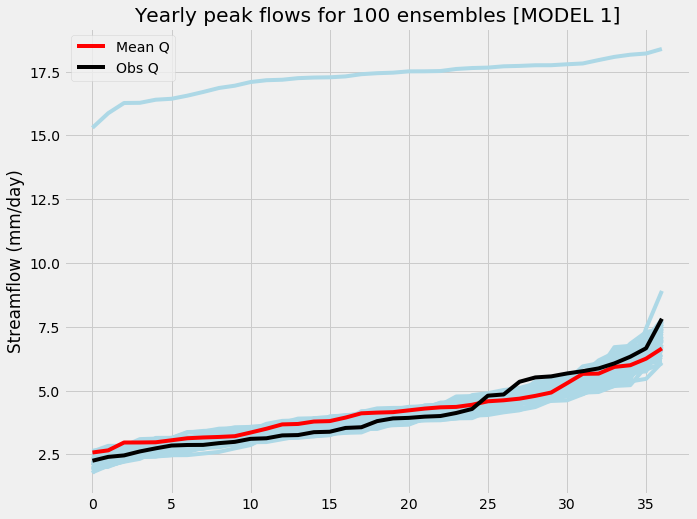

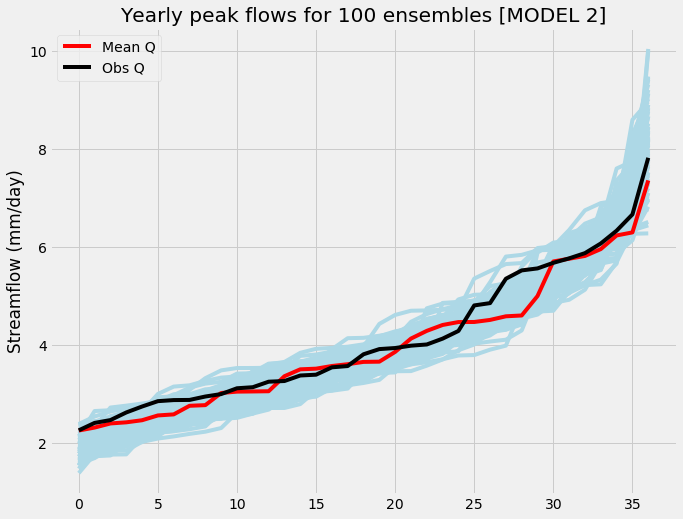

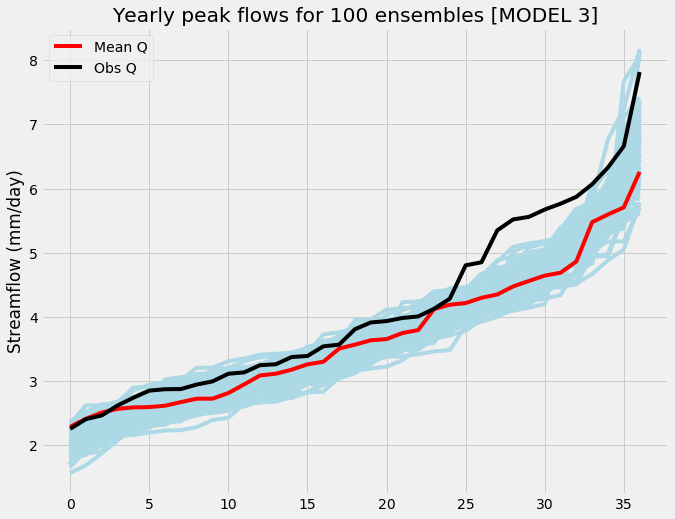

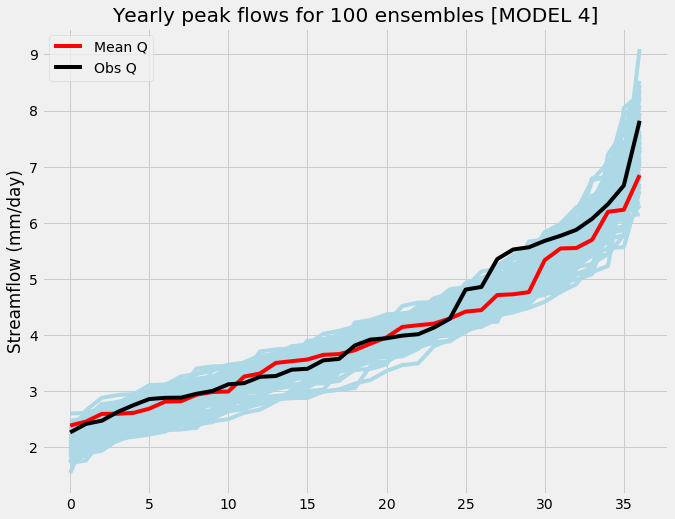

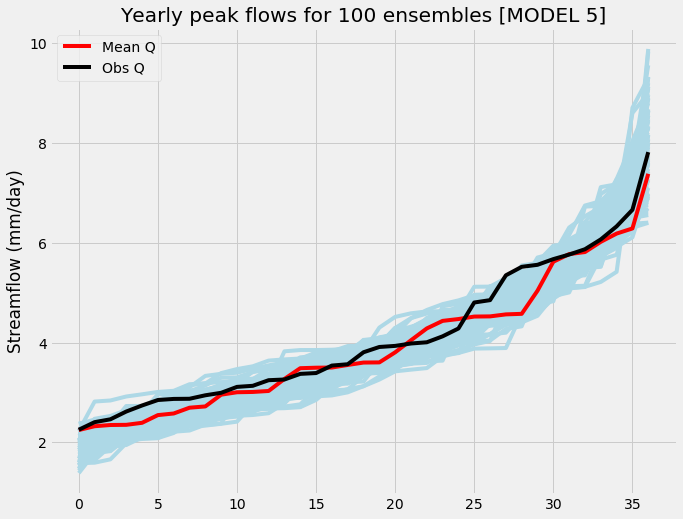

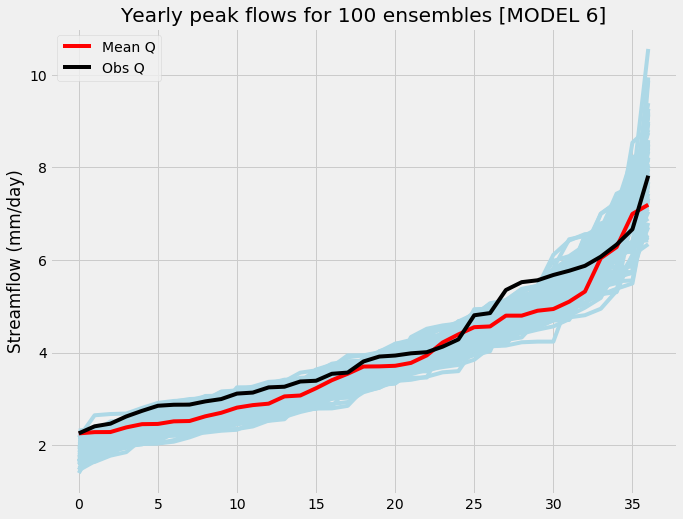

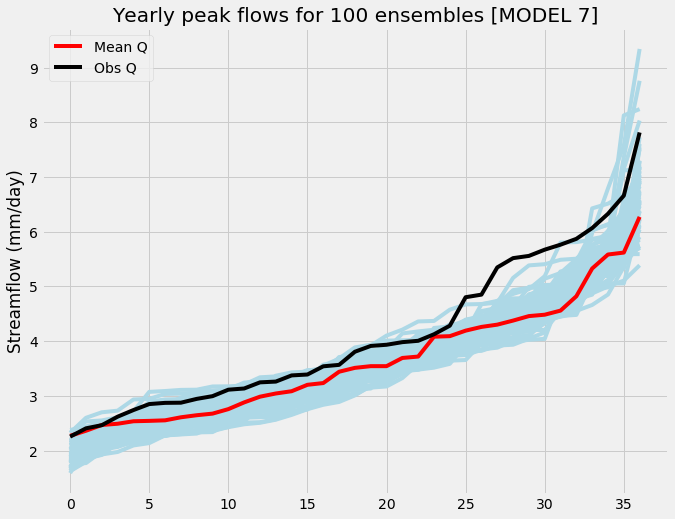

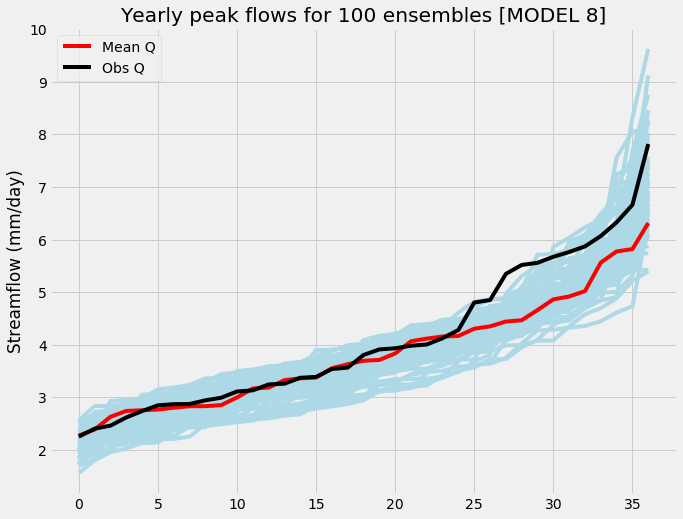

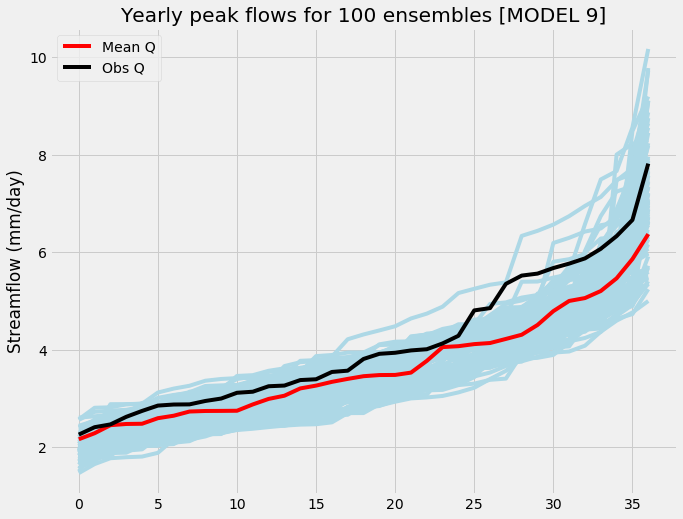

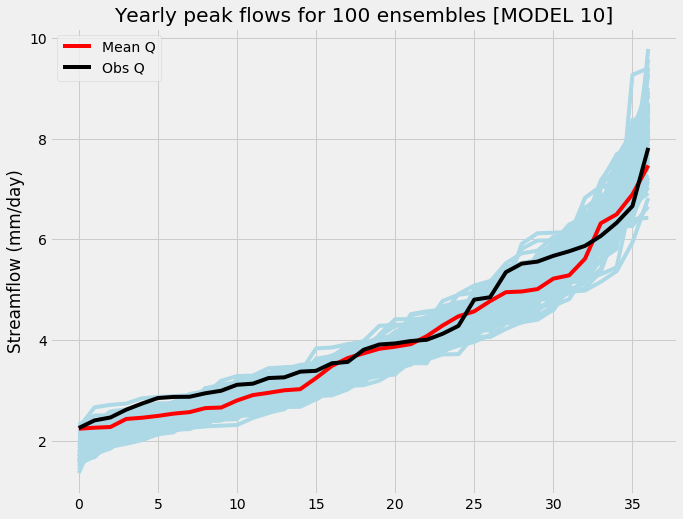

In [10]:
plotpeakq(mod1q, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [MODEL 1]', 'figures/mod1_yearlypeaks.png')
plotpeakq(mod2q, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [MODEL 2]', 'figures/mod2_yearlypeaks.png')
plotpeakq(mod3q, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [MODEL 3]', 'figures/mod3_yearlypeaks.png')
plotpeakq(mod4q, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [MODEL 4]', 'figures/mod4_yearlypeaks.png')
plotpeakq(mod5q, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [MODEL 5]', 'figures/mod5_yearlypeaks.png')
plotpeakq(mod6q, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [MODEL 6]', 'figures/mod6_yearlypeaks.png')
plotpeakq(mod7q, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [MODEL 7]', 'figures/mod7_yearlypeaks.png')
plotpeakq(mod8q, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [MODEL 8]', 'figures/mod8_yearlypeaks.png')
plotpeakq(mod9q, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [MODEL 9]', 'figures/mod9_yearlypeaks.png')
plotpeakq(mod10q, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [MODEL 10]', 'figures/mod10_yearlypeaks.png')

# Distributions of mean ensemble peak streamflows

In [11]:
meanmod1 = mod1q.mean(axis=1)
meanmod2 = mod2q.mean(axis=1)
meanmod3 = mod3q.mean(axis=1)
meanmod4 = mod4q.mean(axis=1)
meanmod5 = mod5q.mean(axis=1)
meanmod6 = mod6q.mean(axis=1)
meanmod7 = mod7q.mean(axis=1)
meanmod8 = mod8q.mean(axis=1)
meanmod9 = mod9q.mean(axis=1)
meanmod10 = mod10q.mean(axis=1)

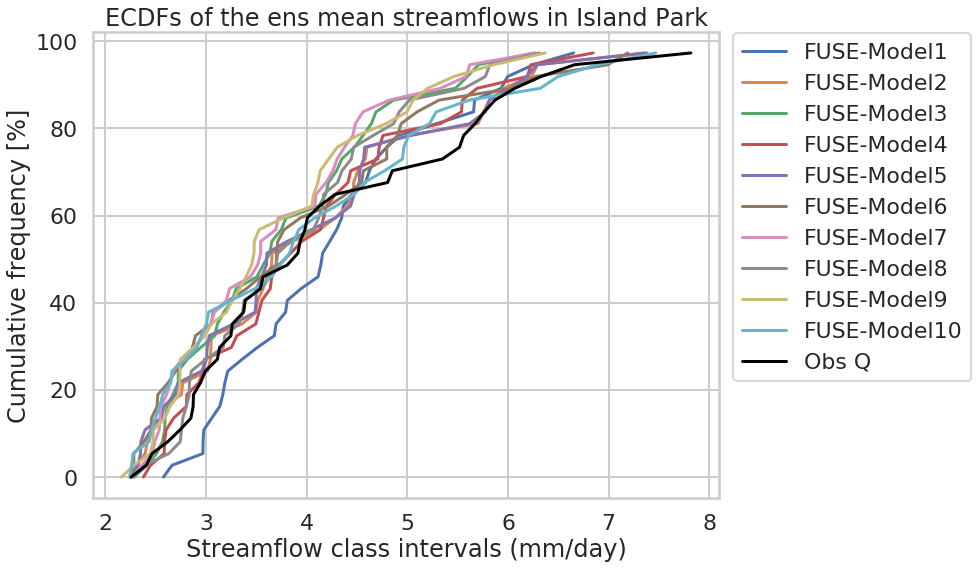

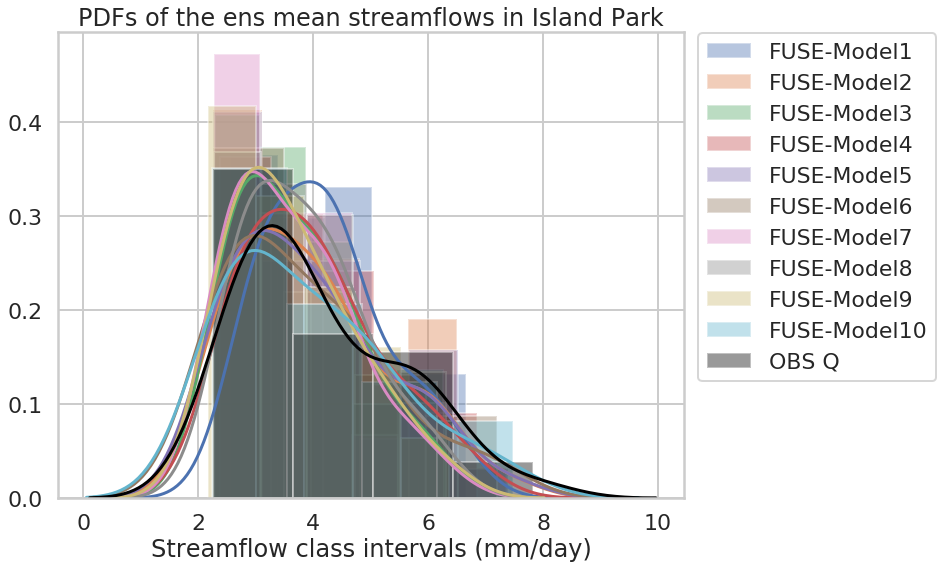

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
sns.set_context('poster')

# CDF PLOT
plt.plot(np.sort(meanmod1), np.linspace(0, 100, len(meanmod1), endpoint=False), label = 'FUSE-Model1')
plt.plot(np.sort(meanmod2), np.linspace(0, 100, len(meanmod2), endpoint=False), label = 'FUSE-Model2')
plt.plot(np.sort(meanmod3), np.linspace(0, 100, len(meanmod3), endpoint=False), label = 'FUSE-Model3')
plt.plot(np.sort(meanmod4), np.linspace(0, 100, len(meanmod4), endpoint=False), label = 'FUSE-Model4')
plt.plot(np.sort(meanmod5), np.linspace(0, 100, len(meanmod5), endpoint=False), label = 'FUSE-Model5')
plt.plot(np.sort(meanmod6), np.linspace(0, 100, len(meanmod6), endpoint=False), label = 'FUSE-Model6')
plt.plot(np.sort(meanmod7), np.linspace(0, 100, len(meanmod7), endpoint=False), label = 'FUSE-Model7')
plt.plot(np.sort(meanmod8), np.linspace(0, 100, len(meanmod8), endpoint=False), label = 'FUSE-Model8')
plt.plot(np.sort(meanmod9), np.linspace(0, 100, len(meanmod9), endpoint=False), label = 'FUSE-Model9')
plt.plot(np.sort(meanmod10), np.linspace(0, 100, len(meanmod10), endpoint=False), label = 'FUSE-Model10')
plt.plot(np.sort(qobs), np.linspace(0, 100, len(qobs), endpoint=False), label = 'Obs Q', color = 'black')
plt.ylabel('Cumulative frequency [%]')
plt.xlabel('Streamflow class intervals (mm/day)')
plt.title('ECDFs of the ens mean streamflows in Island Park')
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1.02))
plt.savefig('figures/empiricalcdf.png', bbox_inches='tight', dpi=300)
plt.show()

# PDF PLOT
sns.distplot(meanmod1, label='FUSE-Model1')
sns.distplot(meanmod2, label='FUSE-Model2')
sns.distplot(meanmod3, label='FUSE-Model3')
sns.distplot(meanmod4, label='FUSE-Model4')
sns.distplot(meanmod5, label='FUSE-Model5')
sns.distplot(meanmod6, label='FUSE-Model6')
sns.distplot(meanmod7, label='FUSE-Model7')
sns.distplot(meanmod8, label='FUSE-Model8')
sns.distplot(meanmod9, label='FUSE-Model9')
sns.distplot(meanmod10, label='FUSE-Model10')
sns.distplot(qobs, label='OBS Q', color='black')

plt.xlabel('Streamflow class intervals (mm/day)')
plt.title('PDFs of the ens mean streamflows in Island Park')
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1.02))
plt.show()

# Ranges and distributions of KGE values

In [13]:
mod1kge = vextract(mod1par, 'kge')
mod2kge = vextract(mod2par, 'kge')
mod3kge = vextract(mod3par, 'kge')
mod4kge = vextract(mod4par, 'kge')
mod5kge = vextract(mod5par, 'kge')
mod6kge = vextract(mod6par, 'kge')
mod7kge = vextract(mod7par, 'kge')
mod8kge = vextract(mod8par, 'kge')
mod9kge = vextract(mod9par, 'kge')
mod10kge = vextract(mod10par, 'kge')

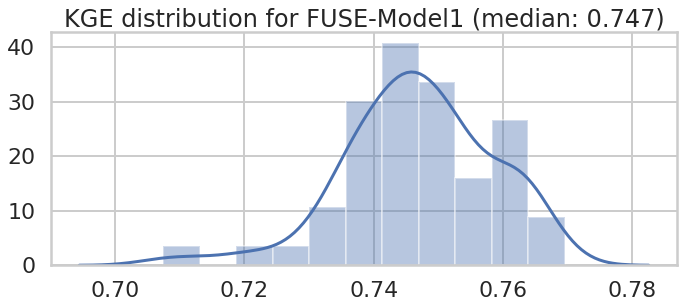

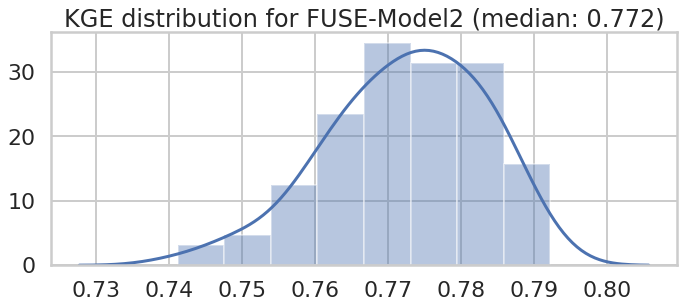

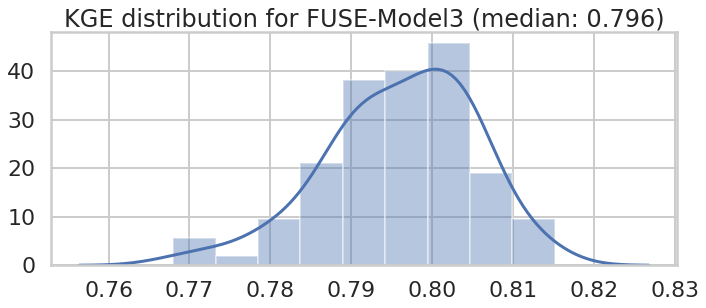

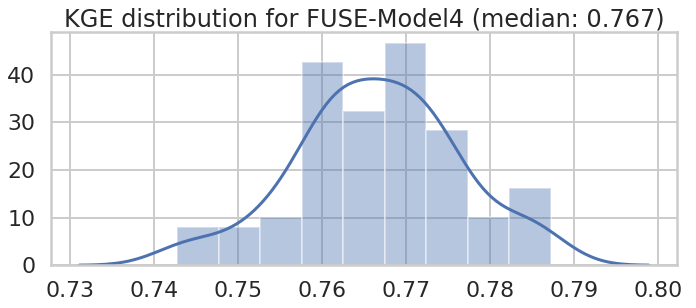

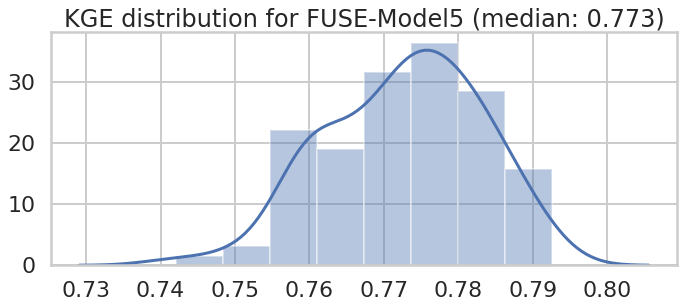

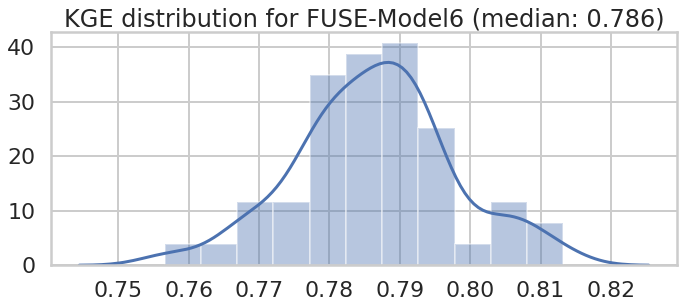

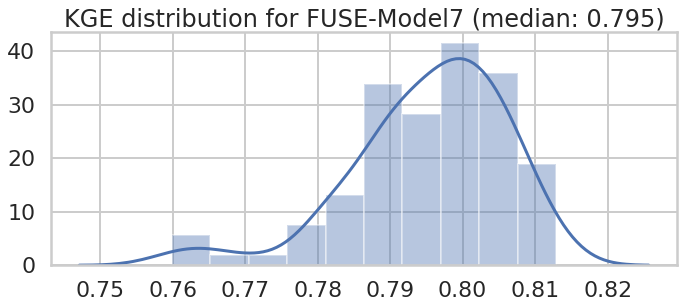

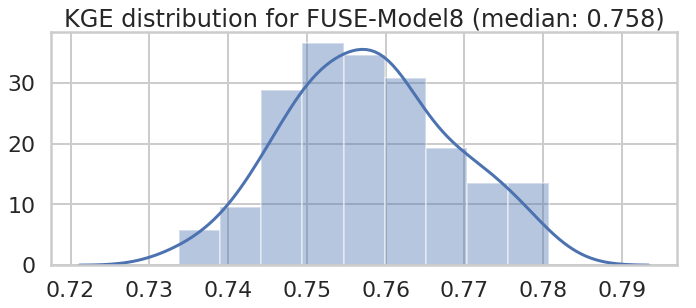

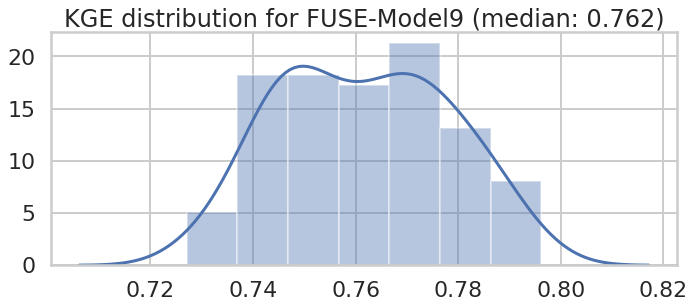

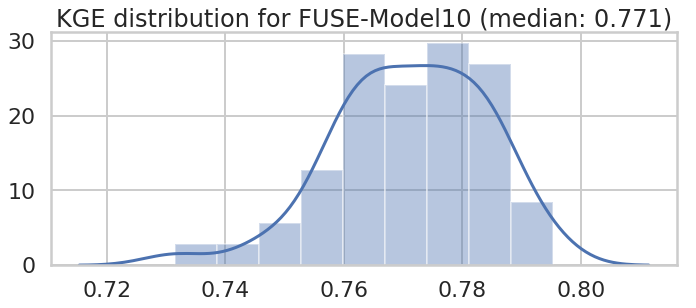

In [14]:
sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("whitegrid")
sns.set_context('poster')

sns.distplot(mod1kge)
plt.title('KGE distribution for FUSE-Model1 (median: {:1.3f})'.format(mod1kge.mean()))
plt.show()

sns.distplot(mod2kge)
plt.title('KGE distribution for FUSE-Model2 (median: {:1.3f})'.format(mod2kge.mean()))
plt.show()

sns.distplot(mod3kge)
plt.title('KGE distribution for FUSE-Model3 (median: {:1.3f})'.format(mod3kge.mean()))
plt.show()

sns.distplot(mod4kge)
plt.title('KGE distribution for FUSE-Model4 (median: {:1.3f})'.format(mod4kge.mean()))
plt.show()

sns.distplot(mod5kge)
plt.title('KGE distribution for FUSE-Model5 (median: {:1.3f})'.format(mod5kge.mean()))
plt.show()

sns.distplot(mod6kge)
plt.title('KGE distribution for FUSE-Model6 (median: {:1.3f})'.format(mod6kge.mean()))
plt.show()

sns.distplot(mod7kge)
plt.title('KGE distribution for FUSE-Model7 (median: {:1.3f})'.format(mod7kge.mean()))
plt.show()

sns.distplot(mod8kge)
plt.title('KGE distribution for FUSE-Model8 (median: {:1.3f})'.format(mod8kge.mean()))
plt.show()

sns.distplot(mod9kge)
plt.title('KGE distribution for FUSE-Model9 (median: {:1.3f})'.format(mod9kge.mean()))
plt.show()

sns.distplot(mod10kge)
plt.title('KGE distribution for FUSE-Model10 (median: {:1.3f})'.format(mod10kge.mean()))
plt.show()

## Time-series plots of yearly maximum flows

In [15]:
def argmaxfunc(ds, dim=None):
    return ds.isel(**{dim: ds['q_routed'].argmax(dim)})


def yearlyVarMax(ncfile, ncvar, iyear):
    '''
    Extracts yearly max based on maximums of one variable
    '''
    ncdat = xr.open_dataset(ncfile)
    mask = ncdat[ncvar].isel(time=0).notnull()  # determine where you have valid data
    ncdat2 = ncdat.fillna(-9999)  # fill nans with a missing flag of some kind
    ncdat3 = ncdat2.groupby('time.year').apply(argmaxfunc, dim='time').where(mask) 
    ncdat4 = ncdat3.where((ncdat3.year > iyear), drop = True)
    return(ncdat4)

In [16]:
mod1ymax=yearlyVarMax(mod1[0], 'q_routed', 1980)
mod2ymax=yearlyVarMax(mod2[0], 'q_routed', 1980)
mod3ymax=yearlyVarMax(mod3[0], 'q_routed', 1980)
mod4ymax=yearlyVarMax(mod4[0], 'q_routed', 1980)
mod5ymax=yearlyVarMax(mod5[0], 'q_routed', 1980)
mod6ymax=yearlyVarMax(mod6[0], 'q_routed', 1980)
mod7ymax=yearlyVarMax(mod7[0], 'q_routed', 1980)
mod8ymax=yearlyVarMax(mod8[0], 'q_routed', 1980)
mod9ymax=yearlyVarMax(mod9[0], 'q_routed', 1980)
mod10ymax=yearlyVarMax(mod10[0], 'q_routed', 1980)

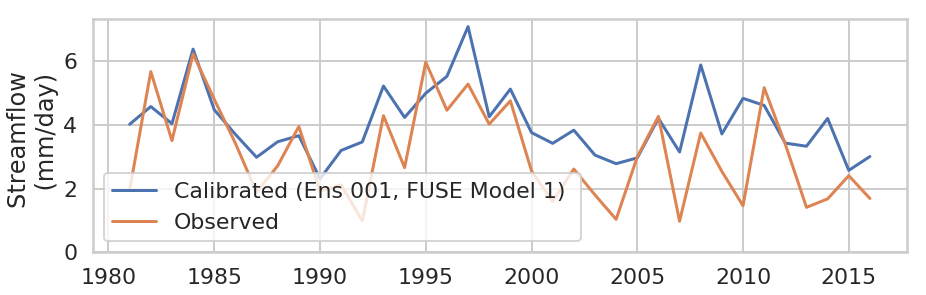

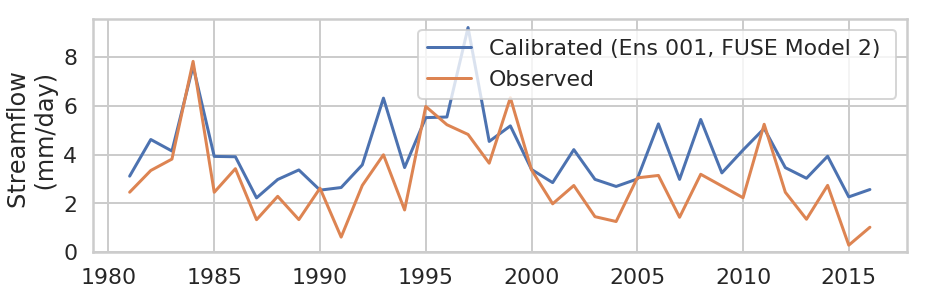

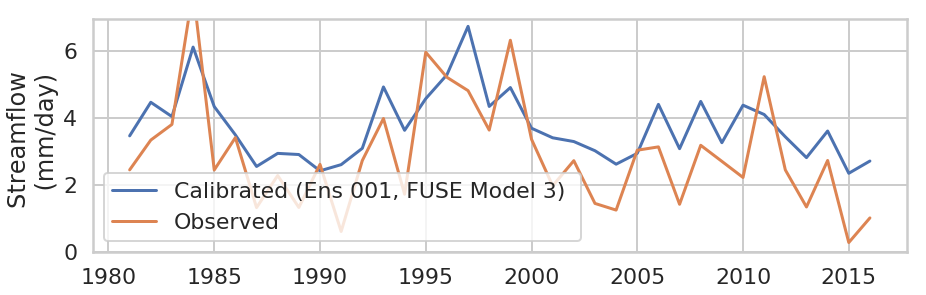

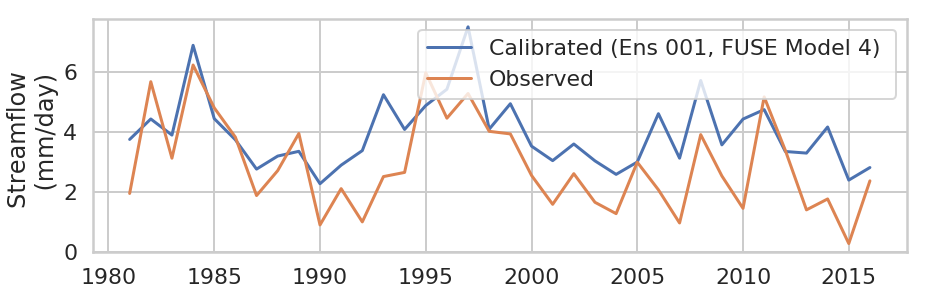

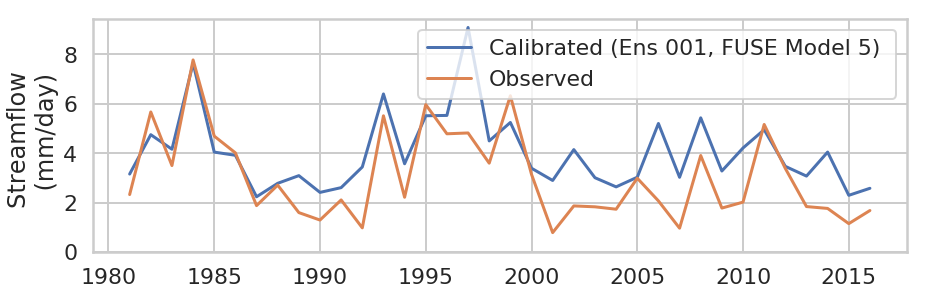

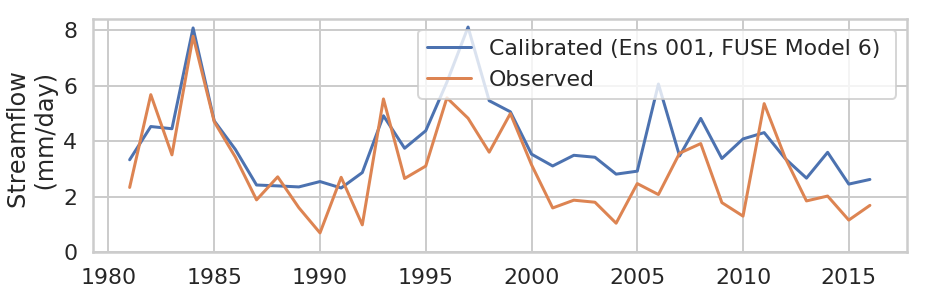

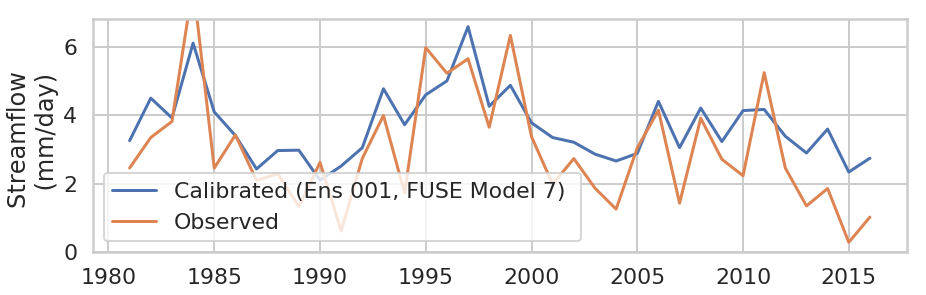

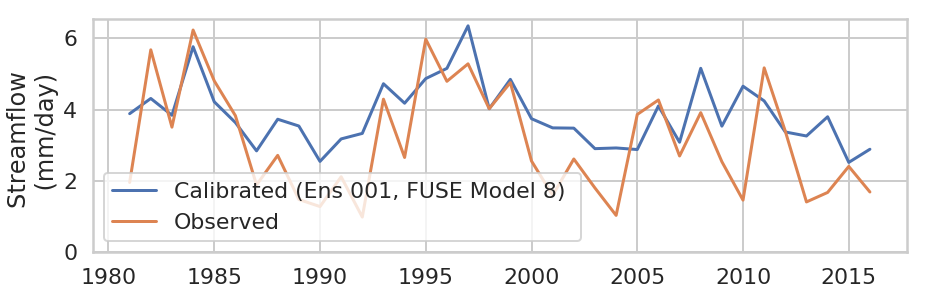

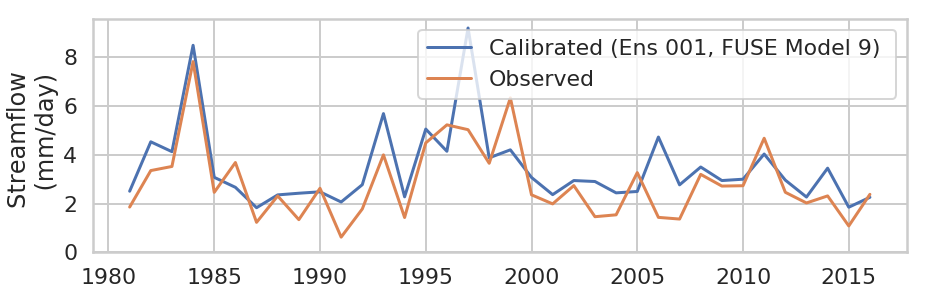

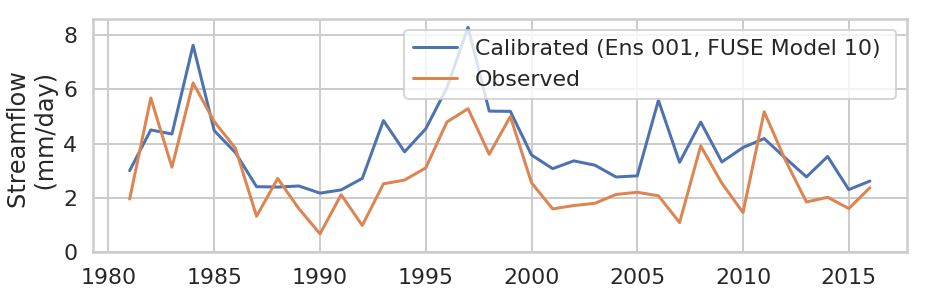

In [17]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.set_style("whitegrid")
sns.set_context('poster')

mod1ymax['q_routed'].plot(label = 'Calibrated (Ens 001, FUSE Model 1) ')
mod1ymax['obsq'].plot(label = 'Observed')
plt.ylabel('Streamflow \n (mm/day)')
plt.title('')
plt.ylim(0, )
plt.xlabel('')
plt.legend()
plt.savefig('figures/mod1ymax.png', bbox_inches='tight', dpi=300)
plt.show()

mod2ymax['q_routed'].plot(label = 'Calibrated (Ens 001, FUSE Model 2) ')
mod3ymax['obsq'].plot(label = 'Observed')
plt.ylabel('Streamflow \n (mm/day)')
plt.title('')
plt.ylim(0, )
plt.xlabel('')
plt.legend()
plt.savefig('figures/mod2ymax.png', bbox_inches='tight', dpi=300)
plt.show()

mod3ymax['q_routed'].plot(label = 'Calibrated (Ens 001, FUSE Model 3) ')
mod3ymax['obsq'].plot(label = 'Observed')
plt.ylabel('Streamflow \n (mm/day)')
plt.title('')
plt.ylim(0, )
plt.xlabel('')
plt.legend()
plt.savefig('figures/mod3ymax.png', bbox_inches='tight', dpi=300)
plt.show()

mod4ymax['q_routed'].plot(label = 'Calibrated (Ens 001, FUSE Model 4) ')
mod4ymax['obsq'].plot(label = 'Observed')
plt.ylabel('Streamflow \n (mm/day)')
plt.title('')
plt.ylim(0, )
plt.xlabel('')
plt.legend()
plt.savefig('figures/mod4ymax.png', bbox_inches='tight', dpi=300)
plt.show()

mod5ymax['q_routed'].plot(label = 'Calibrated (Ens 001, FUSE Model 5) ')
mod5ymax['obsq'].plot(label = 'Observed')
plt.ylabel('Streamflow \n (mm/day)')
plt.title('')
plt.ylim(0, )
plt.xlabel('')
plt.legend()
plt.savefig('figures/mod5ymax.png', bbox_inches='tight', dpi=300)
plt.show()

mod6ymax['q_routed'].plot(label = 'Calibrated (Ens 001, FUSE Model 6) ')
mod6ymax['obsq'].plot(label = 'Observed')
plt.ylabel('Streamflow \n (mm/day)')
plt.title('')
plt.ylim(0, )
plt.xlabel('')
plt.legend()
plt.savefig('figures/mod6ymax.png', bbox_inches='tight', dpi=300)
plt.show()

mod7ymax['q_routed'].plot(label = 'Calibrated (Ens 001, FUSE Model 7) ')
mod7ymax['obsq'].plot(label = 'Observed')
plt.ylabel('Streamflow \n (mm/day)')
plt.title('')
plt.ylim(0, )
plt.xlabel('')
plt.legend()
plt.savefig('figures/mod7ymax.png', bbox_inches='tight', dpi=300)
plt.show()

mod8ymax['q_routed'].plot(label = 'Calibrated (Ens 001, FUSE Model 8) ')
mod8ymax['obsq'].plot(label = 'Observed')
plt.ylabel('Streamflow \n (mm/day)')
plt.title('')
plt.ylim(0, )
plt.xlabel('')
plt.legend()
plt.savefig('figures/mod8ymax.png', bbox_inches='tight', dpi=300)
plt.show()

mod9ymax['q_routed'].plot(label = 'Calibrated (Ens 001, FUSE Model 9) ')
mod9ymax['obsq'].plot(label = 'Observed')
plt.ylabel('Streamflow \n (mm/day)')
plt.title('')
plt.ylim(0, )
plt.xlabel('')
plt.legend()
plt.savefig('figures/mod9ymax.png', bbox_inches='tight', dpi=300)
plt.show()

mod10ymax['q_routed'].plot(label = 'Calibrated (Ens 001, FUSE Model 10) ')
mod10ymax['obsq'].plot(label = 'Observed')
plt.ylabel('Streamflow \n (mm/day)')
plt.title('')
plt.ylim(0, )
plt.xlabel('')
plt.legend()
plt.savefig('figures/mod10ymax.png', bbox_inches='tight', dpi=300)
plt.show()
